<a href="https://colab.research.google.com/github/sudeep-009/Classification-Capstone-Project--Card-Default-Prediction/blob/dev/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
card_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Classification Capstone Project/default of credit card clients.xls - Data.csv',header = 1, index_col ='ID')

#**Understanding Data**

In [20]:
card_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Number of records and features present in the dataset**

In [21]:
print('Number of records present in the dataset is {}'.format(card_df.shape[0]))
print('Number of features present in the dataset is {}'.format(card_df.shape[1]))

Number of records present in the dataset is 30000
Number of features present in the dataset is 24


**Number of duplicate value present in the dataset**

In [22]:
len(card_df[card_df.duplicated(subset=None,keep='first')])

35

**Dropping the duplicate Value present in the dataset**

In [24]:
card_df.drop_duplicates(keep='first', inplace=True)

**Findings:** There is no duplicate item in the dataset.

**Number of null Value present in the dataset**

In [8]:
card_df.isna().sum()

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**Finding:** There is no null value present in the dataset.

**Concise Summary of Dataset**

In [9]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  object


**Finding:** All are of categorical type.

Transforming all the features from categorical to integer type

In [10]:
for i in card_df.columns:
  card_df = card_df.astype({i: int}, errors='raise') 

In [11]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

**Renaming Column names**

In [12]:
#Rename
card_df.rename(columns={'PAY_0':'PAY_SEP','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR',
            'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR',
              'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR',
                'default payment next month':'IS_Defaulter'},inplace=True)

**Statistical Summary of DataSet**

In [14]:
card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_SEP,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_AUG,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_JUL,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_JUN,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


**Unique Value Present in Each of the feature columns**

In [ ]:
for i in card_df.columns:
  print('Number of unique value present in feature {}'.format(i))
  print(card_df[i].unique())
  print('------------------------------')

Number of unique value present in feature LIMIT_BAL
[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
------------------------------
Number of unique value present in feature SEX
[2 1]
------------------------------
Number of unique value present in feature EDUCATION
[2 1 3 5 4 6 0]
------------------------------
Number of unique value present in feature MARRIAGE
[1 2 3 0]
----------------

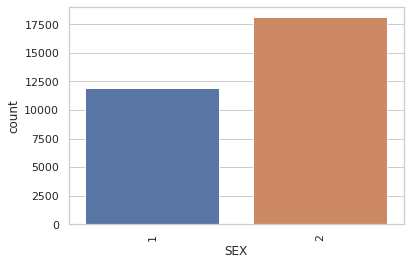

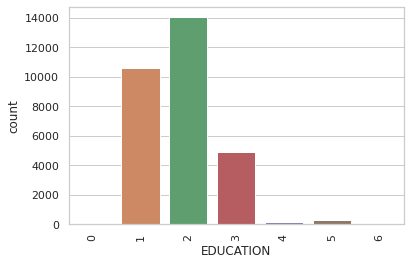

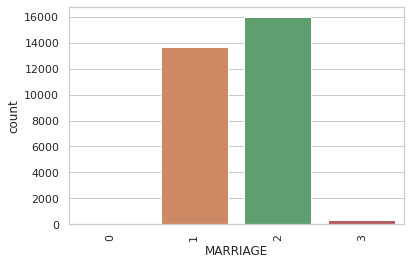

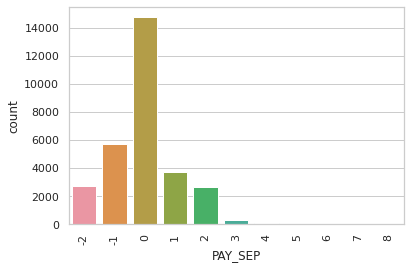

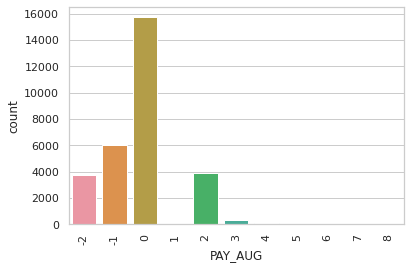

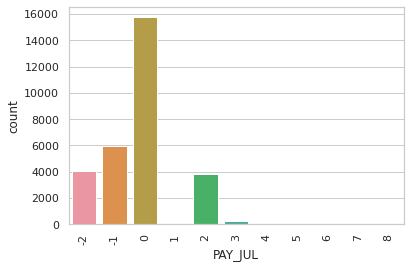

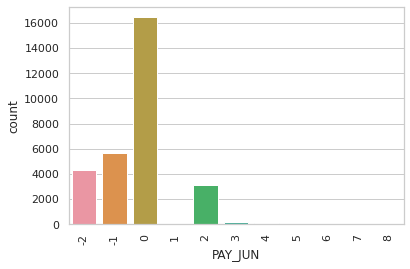

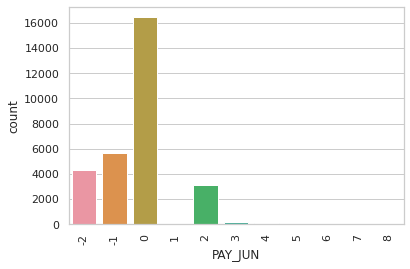

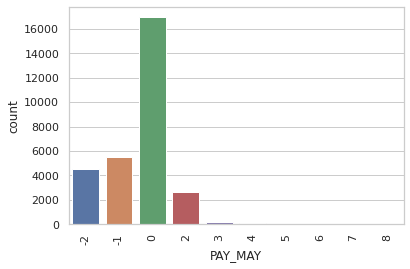

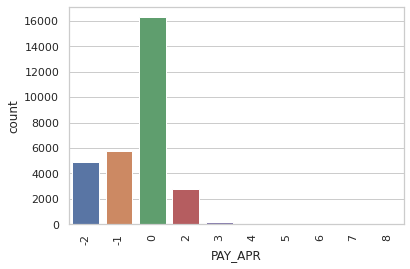

In [ ]:
features = ['SEX','EDUCATION','MARRIAGE','PAY_SEP','PAY_AUG','PAY_JUL','PAY_JUN','PAY_JUN','PAY_MAY','PAY_APR']
for i in features:
  sns.countplot(card_df[i])
  plt.xticks(rotation=90)
  plt.show()

**Findings:**
1. More female card holder than men.

#**Data Processing**

**Education:**

In [ ]:
card_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
#Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
#capping rest of the values into others
edu_dict = {1: 'graduate', 2: 'university', 3: 'high school', 4: 'other',5: 'other', 6: 'other', 0: 'other'}
card_df['EDUCATION'] = card_df['EDUCATION'].map(edu_dict)

**Marriage:**

In [ ]:
card_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
#Marital status (1 = married; 2 = single; 3 = others).
# capping 0 into others
marriage_dict = {1: 'married', 2: 'single', 3: 'other', 0: 'other'}
card_df['MARRIAGE'] = card_df['MARRIAGE'].map(marriage_dict)

**Gender:**

In [ ]:
card_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
gender_dict = {1: 'male', 2: 'female'}
card_df['SEX'] = card_df['SEX'].map(gender_dict)

**Probability of default payment next month**

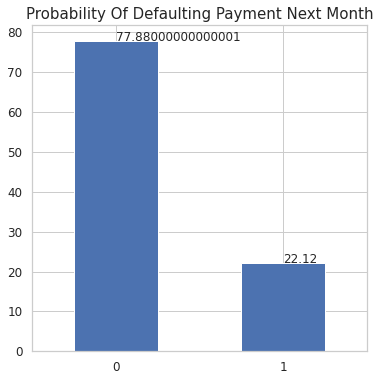

In [ ]:
def_cnt = (card_df['IS_Defaulter'].value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

**Findings:**We can see that the dataset consists of 77% clients are not expected to default payment whereas 23% clients are expected to default the payment

**Age and Balance Limit**

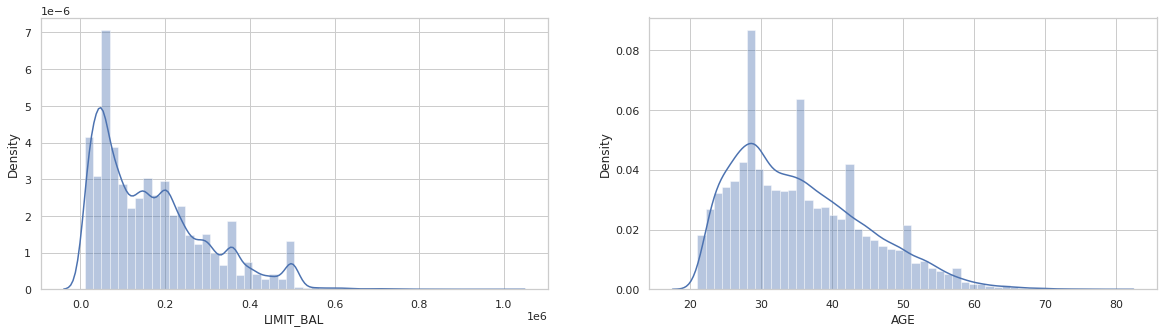

In [ ]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(card_df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(card_df.AGE)

plt.show()

**Findings:** 

1. dataset consists of skewed data of limiting balance and age of clients.
2. We have more number of clients having limiting balance between 0 to 200000 currency.
3. We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.
We will observe the effect of variables on target variable below

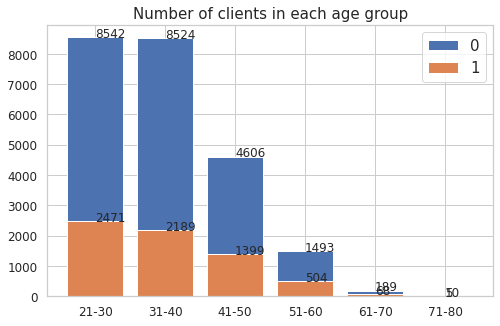

In [ ]:

bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
card_df['AGE_BIN'] = pd.cut(x=card_df.AGE, bins=bins, labels=names, right=True)
age_cnt = card_df.AGE_BIN.value_counts()
age_0 = (card_df.AGE_BIN[card_df['IS_Defaulter'] == 0].value_counts())
age_1 = (card_df.AGE_BIN[card_df['IS_Defaulter'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

**Findings:**
With increasing age group the number of clients that will default the payment next month is decreasing. Hence we can see that Age is important feature to predict the default payment for next month.

<Figure size 1296x576 with 0 Axes>

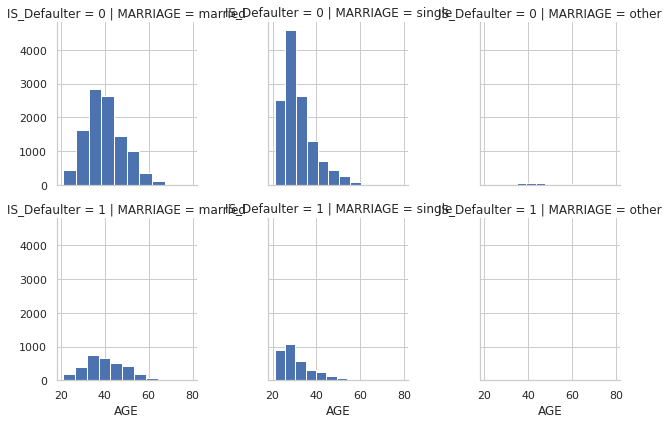

In [ ]:
plt.figure(figsize=(18,8))
g = sns.FacetGrid(card_df, row='IS_Defaulter', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

**Findings:** Married people between age bracket of 30 and 50 and unmarried clients of age 20-30 tend to default payment with unmarried clients higher probability to default payment. Hence we can include MARRIAGE feature of clients to find probability of defaulting the payment next month

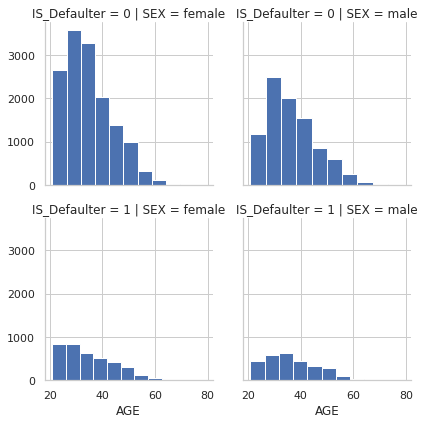

In [ ]:
g = sns.FacetGrid(card_df, row='IS_Defaulter', col='SEX')
g = g.map(plt.hist, 'AGE')

**Findings:** Females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.

In [ ]:
card_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IS_Defaulter', 'AGE_BIN'],
      dtype='object', name=0)

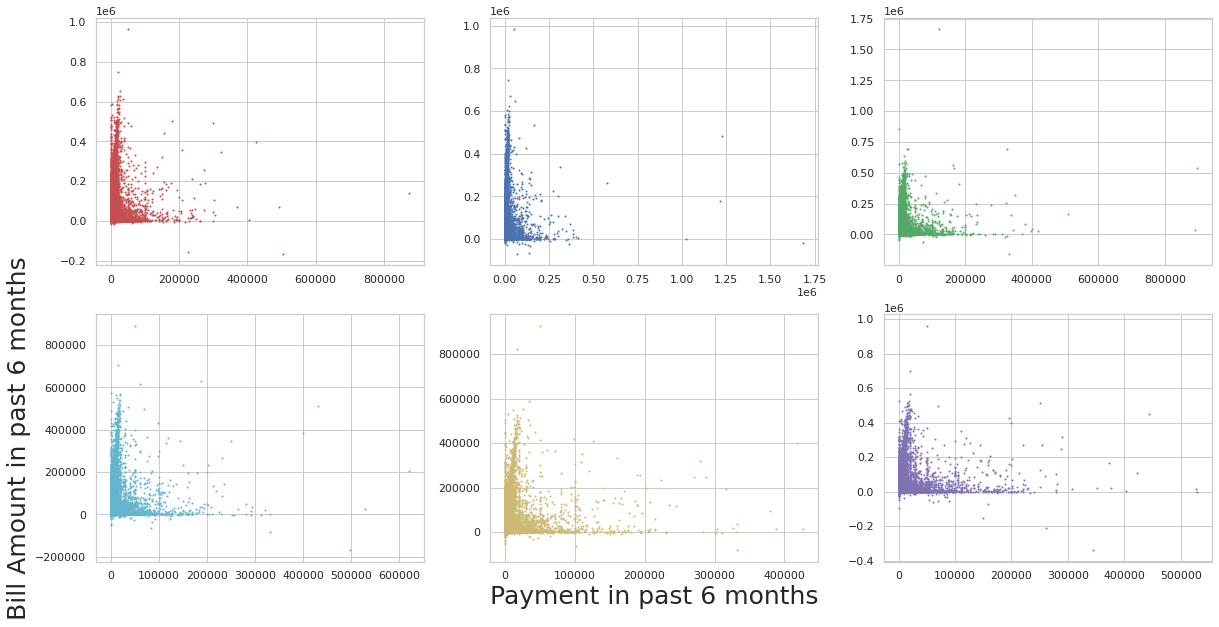

In [ ]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=card_df.PAY_AMT_SEPT, y=card_df.BILL_AMT_SEPT, c='r', s=1)
plt.subplot(232)
plt.scatter(x=card_df.PAY_AMT_AUG, y=card_df.BILL_AMT_AUG, c='b', s=1)

plt.subplot(233)
plt.scatter(x=card_df.PAY_AMT_JUL, y=card_df.BILL_AMT_JUL, c='g', s=1)

plt.subplot(234)
plt.scatter(x=card_df.PAY_AMT_JUN, y=card_df.BILL_AMT_JUN, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=card_df.PAY_AMT_MAY, y=card_df.BILL_AMT_MAY, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=card_df.PAY_AMT_APR, y=card_df.BILL_AMT_APR, c='m', s=1)

plt.show()

**Findings:** There is higher proportion of clients for whom the bill amount is high but payment done against the same is very low.

In [ ]:
card_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_Defaulter,AGE_BIN
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,21-30
2,120000,female,university,single,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,21-30
3,90000,female,university,single,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
4,50000,female,university,married,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
5,50000,male,university,married,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,51-60


**Finding Outlier in the continuours input features**

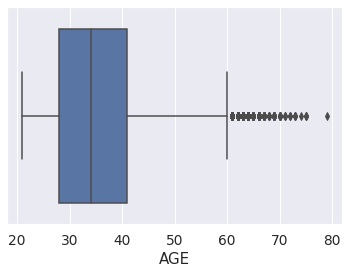

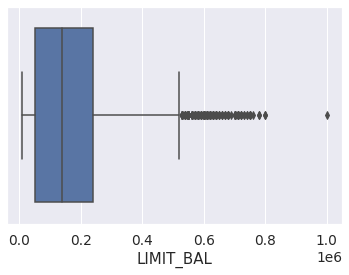

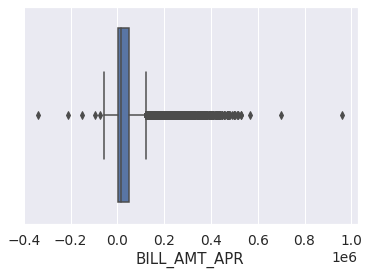

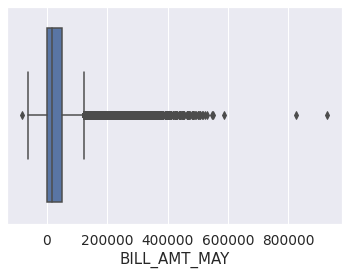

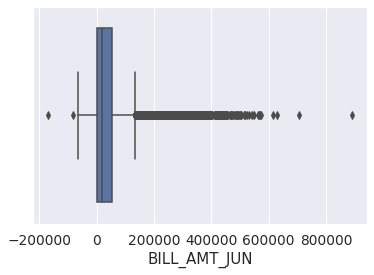

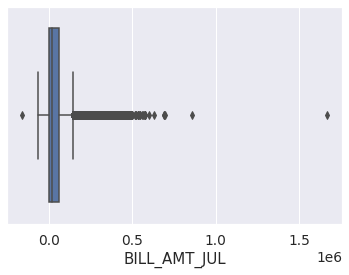

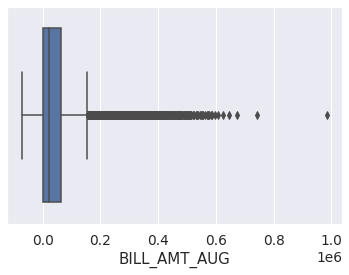

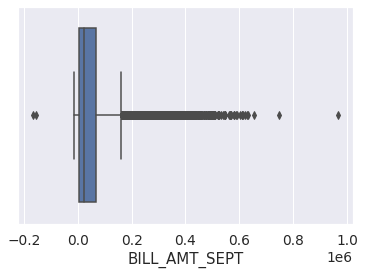

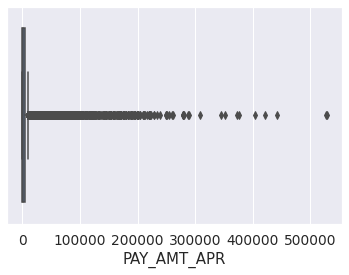

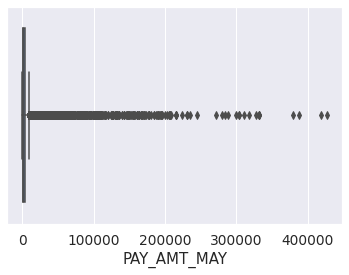

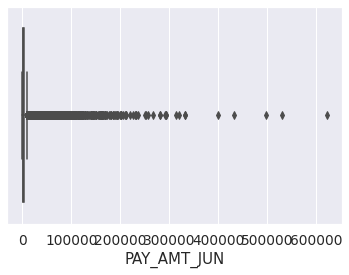

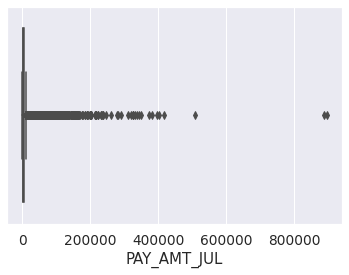

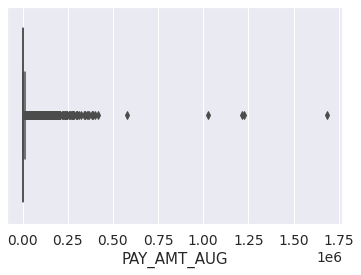

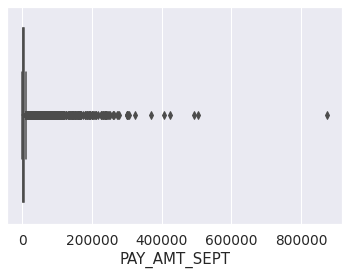

In [ ]:
continuous_features = ['AGE','LIMIT_BAL','BILL_AMT_APR','BILL_AMT_MAY','BILL_AMT_JUN','BILL_AMT_JUL','BILL_AMT_AUG','BILL_AMT_SEPT','PAY_AMT_APR','PAY_AMT_MAY','PAY_AMT_JUN','PAY_AMT_JUL','PAY_AMT_AUG','PAY_AMT_SEPT']
for i in continuous_features:
  sns.boxplot(card_df[i])
  plt.show()

**Findings:**
1. As Logistic Regression is not so much get affected by outlier hence we will not remove any outlier here

In [ ]:
final_df = card_df.copy()
final_df = pd.get_dummies(final_df, columns=['SEX','EDUCATION','MARRIAGE'])

**Finding Correlation**

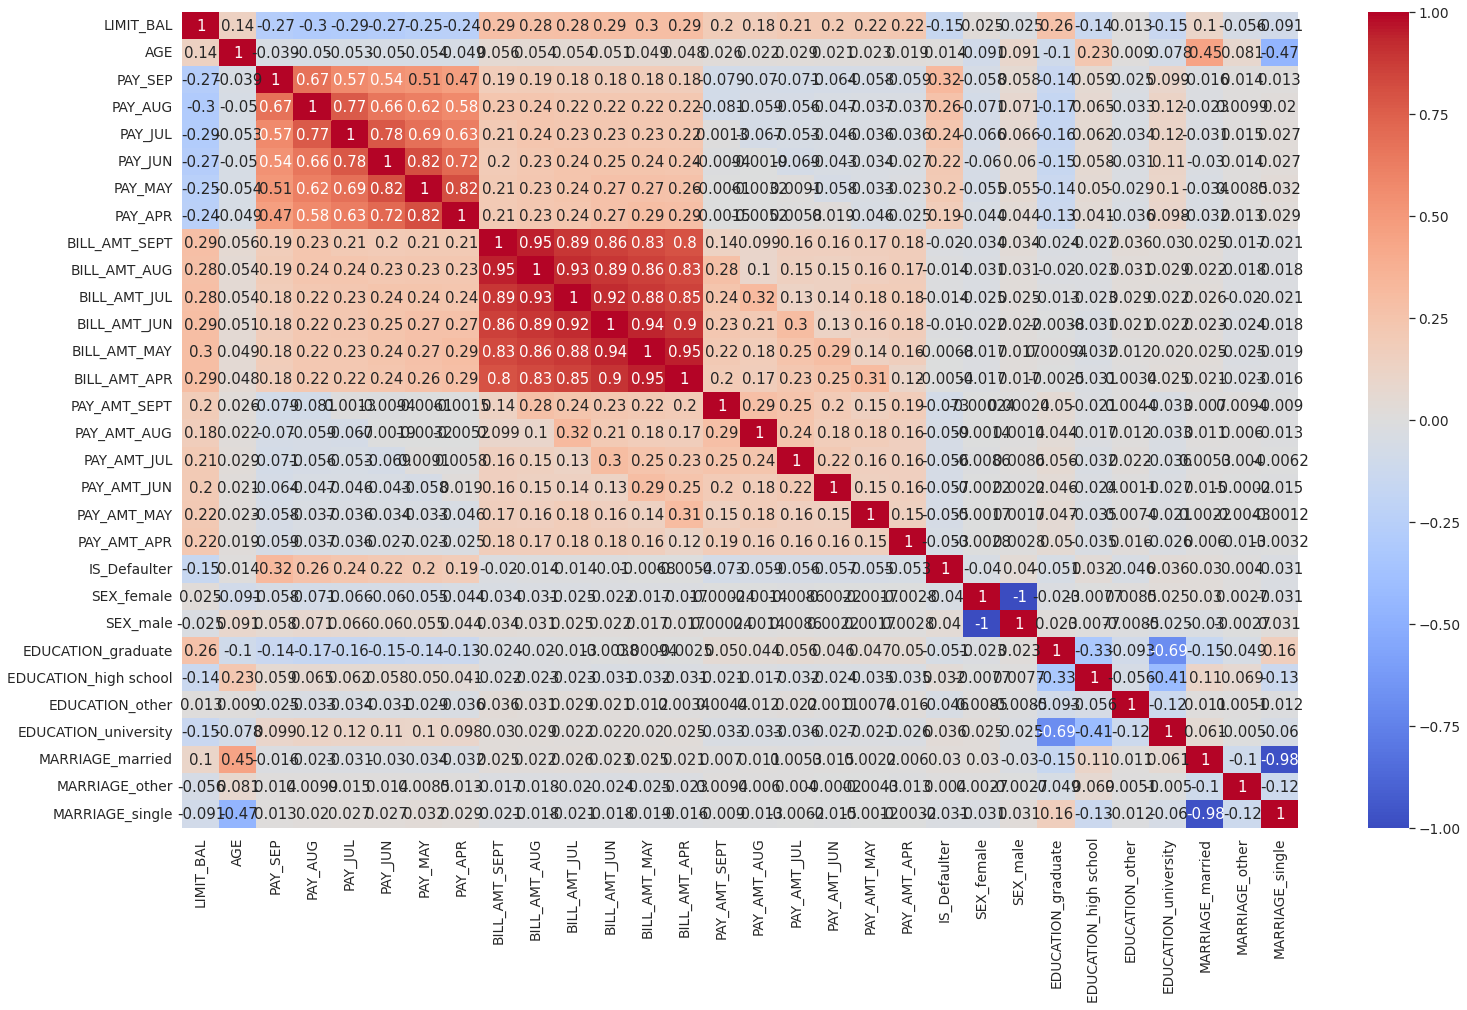

In [ ]:
#finding correlation between max capacity and car type
plt.figure(figsize=(25,15))
sns.heatmap(final_df.corr(method='pearson', min_periods=1),cmap='coolwarm',annot=True)

**Findings:**
1. Keeping only payment in september as all other month are highly collinear.
2. Keeping only bill amount in september as all other are highly collinear.
3. Keeping only female.
4. Keeping only single.

**Feature to be dropped because of collinearity**

In [ ]:
drop_feature = ['PAY_APR','PAY_MAY','PAY_JUN','PAY_JUL','PAY_AUG','BILL_AMT_APR','BILL_AMT_MAY','BILL_AMT_JUN','BILL_AMT_JUL','BILL_AMT_AUG','MARRIAGE_married','SEX_male']
final_df.drop(drop_feature,axis=1,inplace=True)

**Removing Unbalancing in Target Variable**

In [ ]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(final_df[(i for i in list(final_df.describe(include='all').columns) if i != 'IS_Defaulter')], final_df['IS_Defaulter'])

print('Original unbalanced dataset shape', len(final_df))
print('Resampled balanced dataset shape', len(y_smote))

final_df = pd.DataFrame(x_smote, columns=list(i for i in list(final_df.describe(include='all').columns) if i != 'IS_Defaulter'))
final_df['IsDefaulter'] = y_smote

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


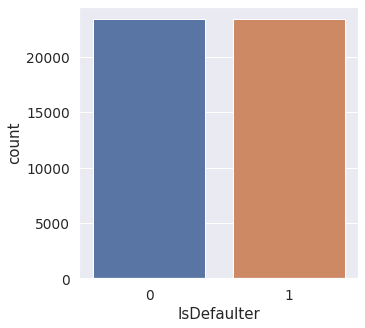

In [ ]:
#check for class imbalance
plt.figure(figsize=(5,5))
sns.countplot('IsDefaulter', data = final_df)

In [ ]:
#dropping column age bin
final_df.drop(['AGE_BIN'],axis=1,inplace=True)

KeyError: ignored

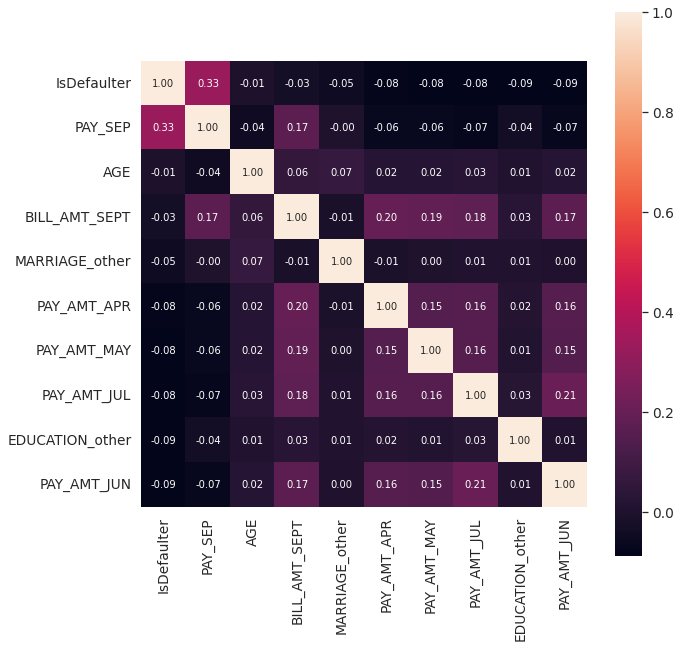

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = final_df.corr()
cols = corrmat.nlargest(k, 'IsDefaulter')['IsDefaulter'].index
cm = np.corrcoef(final_df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

##**Model Building**

###**Logistic Regression and Ridge Classifier**

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

In [ ]:
#function for test and train evaluation report
def trainEvaluation(xTrain,yTrain,model):
  print('-----------------Train Set Evaluation--------------------')
  yTrainPred = model.predict(xTrain)
  print(classification_report(yTrainPred, yTrain))
  print(confusion_matrix(yTrainPred, yTrain))
  print('\nAccuracy Score for model on Train Set: ', accuracy_score(yTrainPred,yTrain))
  print('\n')
  

def testEvaluation(xTest,yTest,model):
  print('-----------------Test Set Evaluation--------------------')
  yTestPred = model.predict(xTest)
  print(classification_report(yTestPred, yTest))
  print(confusion_matrix(yTestPred, yTest))
  print('\nAccuracy Score for model on Test: ', accuracy_score(yTestPred,yTest))
  


*Min Max Scaling For Logistic Regression*

In [ ]:
#X and Y split
X = final_df[[i for i in final_df.columns if i != 'IsDefaulter']]
Y = final_df.IsDefaulter

#scaling of input features
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

*Train Test Split*

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scale,Y,test_size=0.8,random_state=12)

*Training and Evaluation of Model*

In [ ]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
trainEvaluation(X_train,y_train,logReg)
testEvaluation(X_test,y_test,logReg)

-----------------Train Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      5388
           1       0.71      0.85      0.77      3957

    accuracy                           0.79      9345
   macro avg       0.79      0.80      0.79      9345
weighted avg       0.80      0.79      0.79      9345

[[4015 1373]
 [ 603 3354]]

Accuracy Score for model on Train Set:  0.7885500267522739


-----------------Test Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.87      0.74      0.80     21810
           1       0.70      0.84      0.76     15573

    accuracy                           0.78     37383
   macro avg       0.78      0.79      0.78     37383
weighted avg       0.80      0.78      0.78     37383

[[16224  5586]
 [ 2522 13051]]

Accuracy Score for model on Test:  0.7831099697723565


###**Ridge Classifier**

In [ ]:
rClassifier = RidgeClassifier()
rClassifier.fit(X_train, y_train)

RidgeClassifier()

In [ ]:
trainEvaluation(X_train,y_train,rClassifier)
testEvaluation(X_test,y_test,rClassifier)

-----------------Train Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.89      0.73      0.81      5625
           1       0.68      0.87      0.76      3720

    accuracy                           0.79      9345
   macro avg       0.79      0.80      0.79      9345
weighted avg       0.81      0.79      0.79      9345

[[4128 1497]
 [ 490 3230]]

Accuracy Score for model on Train Set:  0.7873729266987693


-----------------Test Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.89      0.73      0.80     22880
           1       0.67      0.86      0.75     14503

    accuracy                           0.78     37383
   macro avg       0.78      0.80      0.78     37383
weighted avg       0.81      0.78      0.78     37383

[[16742  6138]
 [ 2004 12499]]

Accuracy Score for model on Test:  0.7822004654522109


###**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfClassifier = RandomForestClassifier()

In [ ]:
rfClassifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
trainEvaluation(X_train,y_train,rfClassifier)
testEvaluation(X_test,y_test,rfClassifier)

-----------------Train Set Evaluation--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4616
           1       1.00      1.00      1.00      4729

    accuracy                           1.00      9345
   macro avg       1.00      1.00      1.00      9345
weighted avg       1.00      1.00      1.00      9345

[[4616    0]
 [   2 4727]]

Accuracy Score for model on Train Set:  0.9997859818084537


-----------------Test Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.86      0.80      0.83     20101
           1       0.78      0.84      0.81     17282

    accuracy                           0.82     37383
   macro avg       0.82      0.82      0.82     37383
weighted avg       0.82      0.82      0.82     37383

[[16028  4073]
 [ 2718 14564]]

Accuracy Score for model on Test:  0.8183398871144638


###**Random Forest Classifier with Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.inspection import permutation_importance

In [ ]:
#Parameter
n_estimators = [500] # number of trees in the random forest
max_features = [0.4,0.5,0.6,0.7,0.8,0.9,1] 
# number of features in consideration at every split
max_samples = [0.4,0.5,0.6,0.7,0.8,0.9,1]
max_depth = [50,70,90,110] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1,2,3,4,5,6, 7,8,9,10,11,12,13,14,15]
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

# 'min_samples_s': min_samples_,

'min_samples_leaf': min_samples_leaf,
"max_samples" : max_samples,

'bootstrap': bootstrap}

In [ ]:
rf_Classifier = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_Classifier ,param_distributions = random_grid,
               n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)


rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [50, 70, 90, 110],
                                        'max_features': [0.4, 0.5, 0.6, 0.7,
                                                         0.8, 0.9, 1],
                                        'max_samples': [0.4, 0.5, 0.6, 0.7, 0.8,
                                                        0.9, 1],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15],
                                        'n_estimators': [500]},
                   random_state=35, verbose=2)

In [ ]:
#model evaluation on Train and Test Set
trainEvaluation(X_train,y_train,rf_random)
testEvaluation(X_test,y_test,rf_random)

-----------------Train Set Evaluation--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4618
           1       1.00      1.00      1.00      4727

    accuracy                           1.00      9345
   macro avg       1.00      1.00      1.00      9345
weighted avg       1.00      1.00      1.00      9345

[[4615    3]
 [   3 4724]]

Accuracy Score for model on Train Set:  0.9993579454253612


-----------------Test Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     20051
           1       0.78      0.84      0.81     17332

    accuracy                           0.82     37383
   macro avg       0.82      0.82      0.82     37383
weighted avg       0.82      0.82      0.82     37383

[[15978  4073]
 [ 2768 14564]]

Accuracy Score for model on Test:  0.8170023807613086


###**Neural Network Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

Neuralclf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
Neuralclf.fit(X_train, y_train)
# MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              # solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
trainEvaluation(X_train,y_train,Neuralclf)
testEvaluation(X_test,y_test,Neuralclf)

-----------------Train Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      5457
           1       0.70      0.86      0.77      3888

    accuracy                           0.79      9345
   macro avg       0.79      0.80      0.79      9345
weighted avg       0.81      0.79      0.79      9345

[[4062 1395]
 [ 556 3332]]

Accuracy Score for model on Train Set:  0.7912252541466025


-----------------Test Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.88      0.74      0.80     22167
           1       0.69      0.85      0.76     15216

    accuracy                           0.79     37383
   macro avg       0.79      0.80      0.78     37383
weighted avg       0.80      0.79      0.79     37383

[[16444  5723]
 [ 2302 12914]]

Accuracy Score for model on Test:  0.7853302303185941


###**XGBoost Implementaion**

In [ ]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [ ]:
trainEvaluation(X_train,y_train,xgb)
testEvaluation(X_test,y_test,xgb)

-----------------Train Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      5172
           1       0.76      0.86      0.81      4173

    accuracy                           0.82      9345
   macro avg       0.82      0.82      0.82      9345
weighted avg       0.82      0.82      0.82      9345

[[4042 1130]
 [ 576 3597]]

Accuracy Score for model on Train Set:  0.8174424826110219


-----------------Test Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.87      0.78      0.82     20927
           1       0.75      0.85      0.80     16456

    accuracy                           0.81     37383
   macro avg       0.81      0.81      0.81     37383
weighted avg       0.81      0.81      0.81     37383

[[16249  4678]
 [ 2497 13959]]

Accuracy Score for model on Test:  0.8080678383222321
